# COSE361(03)_Final_project_1_2016160325_JunTaeKim

## 1. capture the result of pacman.py with layout test71.lay

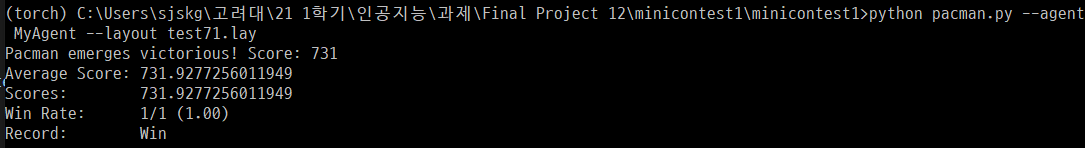

## 2. Description of your agents.


우선 class MyAgent에서 visit_position = set()은 방문 목록을 나타내기 위해서 정의해 준것이고 밑에서 새롭게 정의한 class eachAgentProblem(PositionSearchProblem)에서 사용될 것이다. def initialize(self)부분은 각 agent가 가장 처음에 생성될 때 작동된다. 각 agent마다 반환할 action을 담을 리스트를 self.actions = [] 로 정의해준다. 또한 해당 agent에서 더이상 탐색할 food가 없다면 더이상 추가탐색을 방지하기 위해서 self.flag를 정의해주고 가장처음은 False로 정의해준다.

이제 def find_each_agent_path(self, gamestate)는 함수명처럼 각 agent가 각각의 food탐색을 하도록 한다. 우선 self.flag가 True라면 더이상 해당 agent는 탐색할 것이 food가 없으므로 'Stop'을 return한다. 만약 아직 flag가 Fasle라면 actions를 보고 만약 acions가 빈 리스트라면 self.actions = search.bfs(eachAgentProblem(gamestate, self.index))를 통해 새로운 actions를 food에대한 bfs탐색을 통해서 업데이트 해준다. 이때 food를 bfs로 탐색해준 이유는 cost가 일정하므로 ucs와 bfs가 같고 A* 의 경우 search.py의 휴리스틱을 따로 정의해 줄수없으므로 마찬가지로 bfs와 같게 된다. 따라서 dfs와 bfs중 결정해야 하는데 bfs의 경우 항상 optimal한 가까운 거리를 반환해 주기 때문에 좀더 오래걸릴 지몰라도 dfs보다는 bfs가 낫다고 결정했다. 이때 기존에 정의되어있던 class AnyFoodSearchProblem(PositionSearchProblem)의 경우 단순히 isGoalState함수가 해당 위치에 food가 있는지 여부로만 판단됐었지만 이번에는 각 agent마다 food를 각각 분배해서 좀더 효율적으로 빨리 dot을 먹도록 하는 방식을 위해 class eachAgentProblem(PositionSearchProblem)를 새로 정의했다. 이방식을 통해 bfs탐색을 해서 actions를 반환해준다. 그렇게 actions가 빈 리스트가아닐 경우 가장 첫번째 행동을 return해주면서 리스트에서 빼주기위해 actions.pop(0)을 해준다. 만약 위의 if self.actions == []: 문에서 bfs로 새롭게 path를 탐색했는데도 actions가 여전히 빈리스트라면 더이상 해당 agent는 탐색할 food가 없다는 의미이므로 flag를 True로 바꿔준 뒤 'Stop'을 반환하도록 한다.

다음은 class eachAgentProblem(PositionSearchProblem)에대해 설명하겠다. 우선 __init__(self, gameState, agentIndex) 함수를 먼저보면 self.food는 food[x][y]를 통해 해당 위치에 food가 있는지 여부를 알 수 있도록 하고 walls도 마찬가지이다. self.startState는 각 agentindex의 해당 위치를 반환해 주도록 한다. costFn은 1로 고정되어있다. self.agentIndex는 인수로 들어오는 agentIndex를 받도록 하고 즉 4개의 agent이므로 0,1,2,3중 하나가 들어온다. self.allfood = self.food.asList()는 해당 state에서 전체 food의 위치를 리스트에 담고있게된다. 저 asList()함수는 game.py의 class Grid에 구현되어있는 함수를 이용한 것이다. self.numFood는 전체 food의 개수가 된다. eachnumFood의 경우 전체 food를 총 4명의 agent에게 분배를 해주는데 일부러 딱맞거나 더많이 분배해주도록 self.numFood // 4 + 1 로 정의 한다. 그이유는 바로 다음줄의 self.agent_food = self.allfood[agentIndex * eachnumFood : (agentIndex+1) * eachnumFood]를 보면 알 수 있다. 이 agent_food는 각 agent에게 목표 food를 분배해 준 것인데 이때 food가 남는일 없이 전부 분배해주기 위해서 일부러 eachnumFood를 딱나눠지거나 더 큰값을 갖도록 한것이다. 이렇게 되면 (agentIndex+1) * eachnumFood부분이 실제 allfood의 크기보다 더큰 index가지 indexing될 수 있는데 그 경우 저절로 가능한 index까지만 indexing해주기 때문에 걱정하지 않아도 된다. 즉 0,1,2,3의 agent중 3번 agent의 경우는 다른 agent와 같거나 좀더 적은 food를 맡게 되는 것이다.

이제 isGoalState(self, state)함수를 보면 해당 food가 방문목록에 있는경우는 더 볼것도없이 False를 반환해줌으로써 바로 다른 food를 탐색하도록 한다. 그후 numFood의 수가 각 agent수보다 작거나 같은 경우 단순히 해당 food가 전체 food의 위치중 하나인 경우 True를 반환해주도록 한다. 참고로 이 함수에서 True가 반환되면 search.py의 bfs함수에서 더 탐색하지 않고 해당 path반환하도록해준다. 만약 food수가 더 많다면 좀더 효율적으로 탐색할 필요가 있다. 먼저 해당 state가 당시 agent가 분배받은 food일 경우 방문 목록에 넣어주고 True를 반환해 주도록 한다. 만약 그게 아니더라도 해당위치가 food가 맞고 유클리디안 거리로 (self.agentIndex+1) ** 2 보다 가까운 위치의 food라면 역시 방문목록에 넣어준 뒤 True를 반환해서 해당 위치로 가도록 해준다. (self.agentIndex+1) ** 2 으로 threshold를 결정해준 이유는 각 agent마다 threshold를 다르게 해서 각 agent특성을 다르게 해주기 위함이다. 0번 agent의 경우는 자신이 분배받은 food가 아닐경우 정말 가까운 food만 탐색할 것이고 3번이면 좀더 멀리까지 허용할 것이다. 이렇게 하는 것이 다 같은 거리인 경우보다 좀더 멀리까지 흩어지면서 찾을 수 있을 것 같아서 보다 효율적으로 food를 먹으러 갈 것아서 이렇게 설정했다. 그리고 맨하탄 거리가아니라 유클리디안으로 해준 이유는 좀 더 가까움의 정도를 엄격하게 두기보다는 어느정도 가까우면 자신이 분배받은 food가 아니더라도 그쪽 food를 탐색하도록 하기 위해서이다. 맨하탄 거리로 하면 좀더 많이 가까운경우가 아닌이상 가지 않을 것이고 어떻게보면 유클리디안거리로 설정한 것은 맨하탄거리보다는 좀더 도박성이 있다고 볼 수 있다. 예를 들어 실제 미로로는 벽이 둘러싸고있어서 엄청돌아가야하는데 유클리디안 거리로는 가까운 경우에 그쪽 food를 향해 가려는 경향이 있을 것이기 때문이다. 다만 운이 좋아 맵이 복잡하지않다면 오히려 더 효율적으로 food를 먹을 수도 있을 것이다. 이후 자신이 분배받은 food도 아니고 충분히 가까이 있는 food도 아니라면 False를 반환해서 보다 적합한 다른 food를 찾도록 bfs탐색을 하도록 한다.

즉 이렇게하므로써 MyAgent는 각 Agent들이 다른 속성을 가지고 각각 분배된 food를 향해 움직이고 방문목록도 고려하면서 움직이므로 보다 효율적으로 빠르게 모든 food들을 먹을 수 있다.

## 3. Thress discussions when playing Pacman

### Discuss cases where the agent implemented by yourself is better than the baseline.

baseline으로 구현된  findPathToClosestDot(self, gameState)의 경우 보게되면 해당 agent가 단순히 가장가까운 food를 ucs의 방식을 통해 탐색해서 그쪽을 향해 가도록 한다. 사실 cost는 일정하므로 bfs와 다르지 않다고 보여진다. 중요한 것은 각 agent마다 따로 food를 분배하지 않고 당시 상황에서 가장가까운 food만 향하도록하므로 여러 agent들이 동시에 같은 food를 향할 수있는 문제가 발생한다. 그러나 MyAgent의 경우 bfs로 가까운 food를 탐색하기는 하지만 각 agent가 향하는 food의 중복성을 막기 위해서 food를 분배한다. 또한 자신이 맡은 food가 아니더라도 어느정도가까이 있으면 그food를 향해 나가도록한다. 이렇게 하므로써 baseline과 같이 같은 food를 향해가는 문제를 좀 더 막을 수 있어서 보다 효율적으로 food를 먹을 수 있다. 따라서 아마 맵이 크고 food가 흩어져있는 대부분의 maze에서 MyAgent가 baseline보다 효율적일 것이다.

### Discuss cases where the agent implemented by yourself is worse than the baseline.

앞서 말했듯 대부분의 경우에는 MyAgent가 높은 점수를 받을 것으로 예상되지만 단순히 일직선으로만 향하는 미로가있고 점들이 연이어나오는 경우라면 baseline과 같은점수를 받거나 어쩌면 더 낮은점수를 받을 수 도있다. 그 이유는 점수에 계산 시간도 포함되어있기 때문이다. 단순히 매우 긴 일직선의 미로에서 점들이 연달아서 나오는 경우에는 전부다 한방향으로만 향해가면 되기 때문에 baseline과 MyAgent가 같은 행동을 취할것은 맞지만 MyAgent는 매번 food들을 분배해주고 자신이 분배받지못한 food더라도 거리가가깝다면 해당 food로 향해가는등 해당 미로에서 불필요한 계산들을 하게 된다. 따라서 이경우 어쩌면 불필요한 계산들로 인해 점수가 낮게 나올지도 모른다. 

### Ask & Answer your own question about the above discussion.

Q1. 그렇다면 baseline보다 더 안좋은 성능을 낼 가능성이 있는 map에서도 더 좋은 성능을 내도록 할 수는 없을까?

A1. 여러가지 방법이 있을 것 같다. 예를 들어 앞서말한 일직선의 map에서 agent들의 루트를 기록해나가면서 각 루트가 상당부분 겹친다면 일정 threshold를 주고 그 이상 겹칠경우 하나의 agent만 움직이도록하는 것도 방법이 될 수도 있다. 그러면 해당 일직선 map에서는 시간상 다른 agent들은 계산하지 않아도 되므로 시간면에서 점수를 더 가져갈 수도 있을 것이다. 다만 이것은 도박의 위험성도 있고(실제로 미로가 일직선으로 쭉가다가 큰 미로가 나오는 경우 하나의 agent만으로는 매우 낮은 점수를 받을 것이다.) 매번 각agent들의 루트를 기록하고 비교 한다는 점에서 계산상의 부담이 있다는 단점이 있다. 따라서 이러한 특수한 경우에 더 좋은 성능을 내게 될지라도 다른 대부분의 일반적인 case에 대해서는 계산상의 부담이 더해지므로 전보다는 낮은 점수를 획득할 것이다. 따라서 내 생각엔 이런 특수한 case를 우려하기보다 일반적인 case에서 더 잘작동하도록 하는 것이 더 효율적일 것이다. 특수한 케이스를 고려하기위한 추가적인 계산들이 일반적인 케이스들에 대해서 점수를 낮게 받을 위험이 있기 때문이다. 이것은 선택의 문제로 보여진다.